In [1]:
import requests

In [2]:
url = 'https://finance.naver.com/item/sise_day.naver?code=005930&page=2'
page = requests.get(url)
print(page.text)


<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">
<title>네이버 :: 세상의 모든 지식, 네이버</title>

<style type="text/css">
.error_content * {margin:0;padding:0;}
.error_content img{border:none;}
.error_content em {font-style:normal;}
.error_content {width:410px; margin:80px auto 0; padding:57px 0 0 0; font-size:12px; font-family:"나눔고딕", "NanumGothic", "돋움", Dotum, AppleGothic, Sans-serif; text-align:left; line-height:14px; background:url(https://ssl.pstatic.net/static/common/error/090610/bg_thumb.gif) no-repeat center top; white-space:nowrap;}
.error_content p{margin:0;}
.error_content .error_desc {margin-bottom:21px; overflow:hidden; text-align:center;}
.error_content .error_desc2 {margin-bottom:11px; padding-bottom:7px; color:#888; line-height:18px; border-bottom:1px solid #eee;}
.error_content .error_desc3 {clear:both; color:#888;}
.error_content .error_desc3

In [3]:
my_headers = {'user-agent' : 'Mozilla/5.0'}
page = requests.get(url, headers = my_headers)
print(page.text)


<html lang="ko">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">
<title>네이버 증권</title>

<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230627175424/css/newstock.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230627175424/css/common.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230627175424/css/layout.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230627175424/css/main.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230627175424/css/newstock2.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230627175424/css/newstock3.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230627175424/css/world.css">
</head>
<body>
<script language="JavaS

In [4]:
import pandas as pd
pages = pd.read_html(page.text)
type(pages)

list

In [5]:
len(pages)

2

In [6]:
new_url = 'https://finance.naver.com/item/sise_day.naver?code=005930&page='
all_tables = pd.DataFrame()

In [9]:
for page_number in range(1, 2):
  full_url = new_url + str(page_number)
  print(f'{page_number} 번째 페이지 읽어오기({full_url})')
  page = requests.get(full_url, headers=my_headers)
  table = pd.read_html(page.text)[0]
  print(f'전체 {len(all_tables.index)} 줄에 {len(table.index)} 줄추가')
  all_tables = pd.concat([all_tables, table])

1 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=1)
전체 0 줄에 15 줄추가


In [11]:
all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.06.29,72700.0,0.0,73100.0,73400.0,72600.0,8955950.0
2,2023.06.28,72700.0,100.0,72600.0,72700.0,72000.0,8783093.0
3,2023.06.27,72600.0,200.0,72500.0,72600.0,72000.0,9442997.0
4,2023.06.26,72400.0,800.0,71700.0,72500.0,71500.0,10541901.0
5,2023.06.23,71600.0,300.0,72000.0,72200.0,71600.0,12329484.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2023.06.22,71300.0,800.0,70200.0,71500.0,70100.0,11411007.0


In [13]:
all_tables.dropna(inplace = True)
all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
1,2023.06.29,72700.0,0.0,73100.0,73400.0,72600.0,8955950.0
2,2023.06.28,72700.0,100.0,72600.0,72700.0,72000.0,8783093.0
3,2023.06.27,72600.0,200.0,72500.0,72600.0,72000.0,9442997.0
4,2023.06.26,72400.0,800.0,71700.0,72500.0,71500.0,10541901.0
5,2023.06.23,71600.0,300.0,72000.0,72200.0,71600.0,12329484.0
9,2023.06.22,71300.0,800.0,70200.0,71500.0,70100.0,11411007.0
10,2023.06.21,70500.0,900.0,70700.0,71200.0,70400.0,10626603.0
11,2023.06.20,71400.0,200.0,70700.0,71400.0,70400.0,11557883.0
12,2023.06.19,71200.0,600.0,71300.0,71700.0,70900.0,11100887.0
13,2023.06.16,71800.0,300.0,71800.0,71900.0,70900.0,15373696.0


In [14]:
all_tables.rename(columns={'날짜': 'date', '종가' : 'end_price', '시가':'start_price', '고가':'highest_price', '저가':'lowest_price'}, inplace = True)
all_tables

,date,end_price,전일비,start_price,highest_price,lowest_price,거래량
1,2023.06.29,72700.0,0.0,73100.0,73400.0,72600.0,8955950.0
2,2023.06.28,72700.0,100.0,72600.0,72700.0,72000.0,8783093.0
3,2023.06.27,72600.0,200.0,72500.0,72600.0,72000.0,9442997.0
4,2023.06.26,72400.0,800.0,71700.0,72500.0,71500.0,10541901.0
5,2023.06.23,71600.0,300.0,72000.0,72200.0,71600.0,12329484.0
9,2023.06.22,71300.0,800.0,70200.0,71500.0,70100.0,11411007.0
10,2023.06.21,70500.0,900.0,70700.0,71200.0,70400.0,10626603.0
11,2023.06.20,71400.0,200.0,70700.0,71400.0,70400.0,11557883.0
12,2023.06.19,71200.0,600.0,71300.0,71700.0,70900.0,11100887.0
13,2023.06.16,71800.0,300.0,71800.0,71900.0,70900.0,15373696.0


In [15]:
all_tables.drop(['전일비','거래량'], axis=1, inplace=True)
all_tables

,date,end_price,start_price,highest_price,lowest_price
1,2023.06.29,72700.0,73100.0,73400.0,72600.0
2,2023.06.28,72700.0,72600.0,72700.0,72000.0
3,2023.06.27,72600.0,72500.0,72600.0,72000.0
4,2023.06.26,72400.0,71700.0,72500.0,71500.0
5,2023.06.23,71600.0,72000.0,72200.0,71600.0
9,2023.06.22,71300.0,70200.0,71500.0,70100.0
10,2023.06.21,70500.0,70700.0,71200.0,70400.0
11,2023.06.20,71400.0,70700.0,71400.0,70400.0
12,2023.06.19,71200.0,71300.0,71700.0,70900.0
13,2023.06.16,71800.0,71800.0,71900.0,70900.0


In [16]:
all_tables['midian_price'] = all_tables['highest_price'] - ((all_tables['highest_price']- all_tables['lowest_price'])/2)
all_tables

,date,end_price,start_price,highest_price,lowest_price,midian_price
1,2023.06.29,72700.0,73100.0,73400.0,72600.0,73000.0
2,2023.06.28,72700.0,72600.0,72700.0,72000.0,72350.0
3,2023.06.27,72600.0,72500.0,72600.0,72000.0,72300.0
4,2023.06.26,72400.0,71700.0,72500.0,71500.0,72000.0
5,2023.06.23,71600.0,72000.0,72200.0,71600.0,71900.0
9,2023.06.22,71300.0,70200.0,71500.0,70100.0,70800.0
10,2023.06.21,70500.0,70700.0,71200.0,70400.0,70800.0
11,2023.06.20,71400.0,70700.0,71400.0,70400.0,70900.0
12,2023.06.19,71200.0,71300.0,71700.0,70900.0,71300.0
13,2023.06.16,71800.0,71800.0,71900.0,70900.0,71400.0


In [17]:
all_tables['month'] = all_tables['date'].str[0:7]
all_tables

,date,end_price,start_price,highest_price,lowest_price,midian_price,month
1,2023.06.29,72700.0,73100.0,73400.0,72600.0,73000.0,2023.06
2,2023.06.28,72700.0,72600.0,72700.0,72000.0,72350.0,2023.06
3,2023.06.27,72600.0,72500.0,72600.0,72000.0,72300.0,2023.06
4,2023.06.26,72400.0,71700.0,72500.0,71500.0,72000.0,2023.06
5,2023.06.23,71600.0,72000.0,72200.0,71600.0,71900.0,2023.06
9,2023.06.22,71300.0,70200.0,71500.0,70100.0,70800.0,2023.06
10,2023.06.21,70500.0,70700.0,71200.0,70400.0,70800.0,2023.06
11,2023.06.20,71400.0,70700.0,71400.0,70400.0,70900.0,2023.06
12,2023.06.19,71200.0,71300.0,71700.0,70900.0,71300.0,2023.06
13,2023.06.16,71800.0,71800.0,71900.0,70900.0,71400.0,2023.06


In [18]:
all_tables.set_index('date', inplace=True)
all_tables.sort_index(inplace=True)
all_tables

,end_price,start_price,highest_price,lowest_price,midian_price,month
date,,,,,,
2023.06.16,71800.0,71800.0,71900.0,70900.0,71400.0,2023.06
2023.06.19,71200.0,71300.0,71700.0,70900.0,71300.0,2023.06
2023.06.20,71400.0,70700.0,71400.0,70400.0,70900.0,2023.06
2023.06.21,70500.0,70700.0,71200.0,70400.0,70800.0,2023.06
2023.06.22,71300.0,70200.0,71500.0,70100.0,70800.0,2023.06
2023.06.23,71600.0,72000.0,72200.0,71600.0,71900.0,2023.06
2023.06.26,72400.0,71700.0,72500.0,71500.0,72000.0,2023.06
2023.06.27,72600.0,72500.0,72600.0,72000.0,72300.0,2023.06
2023.06.28,72700.0,72600.0,72700.0,72000.0,72350.0,2023.06


<Axes: xlabel='date'>

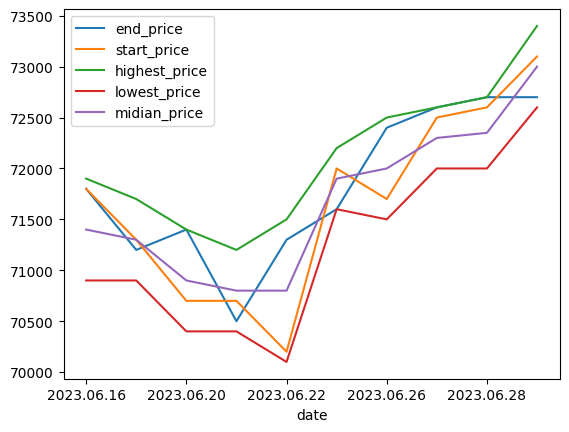

In [19]:
all_tables.plot.line()

<Axes: title={'center': 'midian_price'}, xlabel='[month]'>

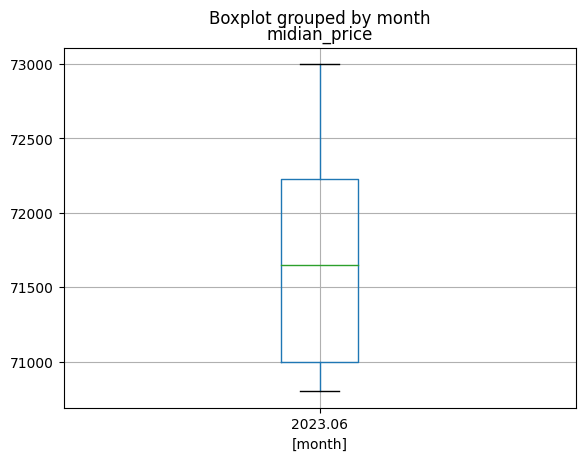

In [20]:
all_tables.boxplot(column=['midian_price'], by=['month'])

In [21]:
import requests

url_1 = 'https://finance.naver.com/item/sise_day.naver?code=232830&page=2'
page = requests.get(url_1)
print(page.text)


<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">
<title>네이버 :: 세상의 모든 지식, 네이버</title>

<style type="text/css">
.error_content * {margin:0;padding:0;}
.error_content img{border:none;}
.error_content em {font-style:normal;}
.error_content {width:410px; margin:80px auto 0; padding:57px 0 0 0; font-size:12px; font-family:"나눔고딕", "NanumGothic", "돋움", Dotum, AppleGothic, Sans-serif; text-align:left; line-height:14px; background:url(https://ssl.pstatic.net/static/common/error/090610/bg_thumb.gif) no-repeat center top; white-space:nowrap;}
.error_content p{margin:0;}
.error_content .error_desc {margin-bottom:21px; overflow:hidden; text-align:center;}
.error_content .error_desc2 {margin-bottom:11px; padding-bottom:7px; color:#888; line-height:18px; border-bottom:1px solid #eee;}
.error_content .error_desc3 {clear:both; color:#888;}
.error_content .error_desc3

In [24]:
my_headers = {'user-agent':'Mozilla/5.0'}
page = requests.get(url_1, headers=my_headers)
print(page.text)


<html lang="ko">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">
<title>네이버 증권</title>

<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230627175424/css/newstock.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230627175424/css/common.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230627175424/css/layout.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230627175424/css/main.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230627175424/css/newstock2.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230627175424/css/newstock3.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230627175424/css/world.css">
</head>
<body>
<script language="JavaS

In [29]:
import pandas as pd

In [30]:
pages = pd.read_html(page.text)
type(pages)

list

In [31]:
len(pages)

2

In [32]:
pages[0]

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.06.15,5240.0,10.0,5660.0,5730.0,4735.0,48438.0
2,2023.06.14,5250.0,675.0,4600.0,5260.0,4600.0,83210.0
3,2023.06.13,4575.0,595.0,4395.0,4575.0,4300.0,62641.0
4,2023.06.12,3980.0,515.0,3670.0,3980.0,3325.0,30759.0
5,2023.06.09,3465.0,55.0,3690.0,3690.0,3465.0,2918.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2023.06.08,3520.0,5.0,3525.0,3600.0,3450.0,544.0


In [34]:
pages[1]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,맨앞,1,2,3,4,5,6,7,8,9,10,다음,맨뒤


In [35]:
all_tables_1 = pd.DataFrame()

In [42]:
for page_number in range(1,2):
  full_url = url_1 + str(page_number)
  print(f'{page_number}번째 페이지 읽어오기({full_url})')
  page = requests.get(full_url, headers=my_headers)
  table = pd.read_html(page.text)[0]
  print(f'전체{len(all_tables.index)} 줄에 {len(table.index)} 줄추가')
  all_tables_1 = pd.concat([all_tables_1, table])

1번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=232830&page=21)
전체10 줄에 15 줄추가


In [43]:
all_tables

,end_price,start_price,highest_price,lowest_price,midian_price,month
date,,,,,,
2023.06.16,71800.0,71800.0,71900.0,70900.0,71400.0,2023.06
2023.06.19,71200.0,71300.0,71700.0,70900.0,71300.0,2023.06
2023.06.20,71400.0,70700.0,71400.0,70400.0,70900.0,2023.06
2023.06.21,70500.0,70700.0,71200.0,70400.0,70800.0,2023.06
2023.06.22,71300.0,70200.0,71500.0,70100.0,70800.0,2023.06
2023.06.23,71600.0,72000.0,72200.0,71600.0,71900.0,2023.06
2023.06.26,72400.0,71700.0,72500.0,71500.0,72000.0,2023.06
2023.06.27,72600.0,72500.0,72600.0,72000.0,72300.0,2023.06
2023.06.28,72700.0,72600.0,72700.0,72000.0,72350.0,2023.06
